In [ ]:
import gdown
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

#Dataset: https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing
# Define el enlace compartido de Google Drive
url = 'https://drive.google.com/uc?id=1UN8qP4GMmJhzbDNzxNhpnM83br1FVxI-'

# Especifica la ubicación donde deseas guardar el archivo
output = '/content/bank.csv'

# Descarga el archivo desde el enlace compartido
gdown.download(url, output, quiet=False)
data = pd.read_csv(output, sep=';')

# Procesar los datos
label_encoder = LabelEncoder()
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Transformar etiquetas a numéricas
data['y'] = label_encoder.fit_transform(data['y'])

# Dividir en características y etiquetas
X = data.drop('y', axis=1)
y = data['y']

Downloading...
From: https://drive.google.com/uc?id=1UN8qP4GMmJhzbDNzxNhpnM83br1FVxI-
To: /content/bank.csv
100%|██████████| 461k/461k [00:00<00:00, 18.0MB/s]


Distribución de clases antes del oversampling: Counter({0: 4000, 1: 521})


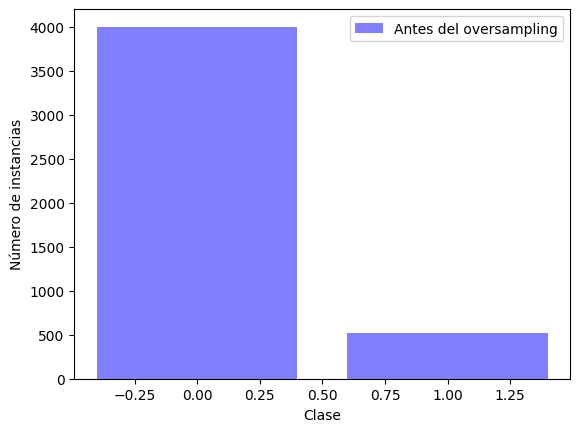

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt


# Contar las instancias por clase antes del oversampling
print('Distribución de clases antes del oversampling:', Counter(y))
plt.bar(Counter(y).keys(), Counter(y).values(), color='b', alpha=0.5, label='Antes del oversampling')
plt.xlabel('Clase')
plt.ylabel('Número de instancias')
plt.legend()
plt.show()


Distribución de clases después del oversampling: Counter({0: 4000, 1: 4000})


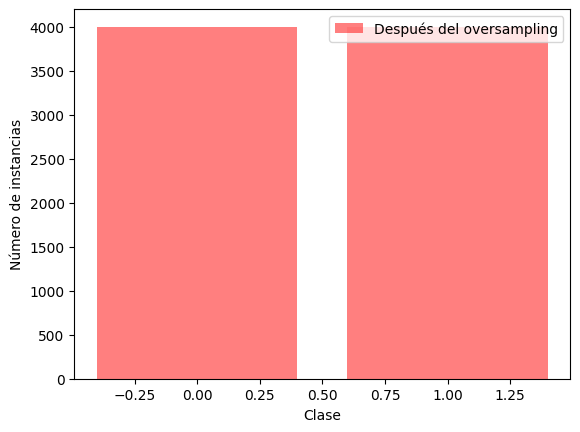

In [ ]:
# Aplicar oversampling utilizando RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Contar las instancias por clase después del oversampling
print('Distribución de clases después del oversampling:', Counter(y_resampled))

# Visualizar la distribución de las clases antes y después del oversampling
plt.bar(Counter(y_resampled).keys(), Counter(y_resampled).values(), color='r', alpha=0.5, label='Después del oversampling')
plt.xlabel('Clase')
plt.ylabel('Número de instancias')
plt.legend()
plt.show()


In [ ]:
#Mejora el F1-Score?